## Problem statements

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.

You have historical data from previous applicants that you can use as a training set for logistic regression.
For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

#### Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

#### Plotting functions

In [3]:
def plot_2d (figure, x ,y, plot_title, x_title, y_title, color="blue"):
    plt.figure(figure)
    plt.plot(x, y, c=color)
    plt.title(plot_title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)

def plot_scatter (figure, x ,y, plot_title, x_title, y_title, color="red",marker='x'):
    plt.figure(figure)
    plt.scatter(x, y, marker=marker, c=color)
    plt.title(plot_title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)

def plot_classification_2d(figure,x,y,plot_title,x1_title,x2_title):
    plt.figure(figure)
    for i in range(len(y)):
        if(y[i] == 0):
            plt.scatter(x[0][i],x[1][i],c="red",marker="x")
        else:
            plt.scatter(x[0][i],x[1][i],c="Blue", marker=".")
    plt.title(plot_title)
    plt.xlabel(x1_title)
    plt.ylabel(x2_title)



#### Loading data and visualizing

y_train = (100,) x_train = (2, 100)


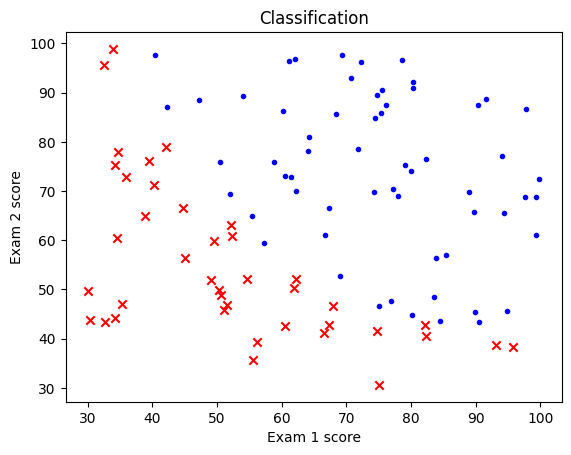

In [4]:
data = pd.read_csv("Data\ex2data1.txt",header=None)
x_train = [data[0],data[1]]
y_train = data[2]

print(f"y_train = {np.shape(y_train)} x_train = {np.shape(x_train)}")
plot_classification_2d(1,x_train,y_train,"Classification","Exam 1 score","Exam 2 score")

#### sigmoid function

In [5]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
    g = 1/(1 + math.e** -z)
    
    return g

#### Compute cost

In [6]:
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost 
    """

    m, n = X.shape
    cost = 0
    for i in range(m):
        z_wb = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_wb)
        cost += -y[i] * math.log(f_wb_i) - (1 - y[i]) * math.log(1-f_wb_i)

    total_cost = cost/m
    
    return total_cost

#### Compute gradient

In [7]:
def compute_gradient(X, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        z_wb = np.dot(X[i],w) + b
        f_wb = sigmoid(z_wb)
        dj_db += (f_wb - y[i])

        for j in range(n):
            dj_dw[j] += (f_wb - y[i]) * X[i][j]
            
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    ### END CODE HERE ###

        
    return dj_db, dj_dw

#### Compute Gradient

In [8]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

#### Predict

In [9]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) + b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb >= 0.5 else 0
        
    ### END CODE HERE ### 
    return p